# 🐦 BIRD RECOGNITION

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [5]:
# 1. Charger les données
dataset_path = "images"  # Remplace par le chemin de ton dataset

# 80% entraînement, 20% test
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# Prétraitement
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 3408 files belonging to 20 classes.
Using 2727 files for training.
Found 3408 files belonging to 20 classes.
Using 681 files for validation.


In [6]:

# 2. Importer un modèle pré-entraîné (MobileNetV2)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Ne pas entraîner les couches du modèle de base

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 106s 11us/step


In [7]:
# 3. Ajouter des couches pour la classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)  # 20 classes

model = Model(inputs=base_model.input, outputs=predictions)


In [8]:

# 4. Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# 5. Entraîner le modèle
history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[
    EarlyStopping(patience=3, restore_best_weights=True)
])

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.1556 - loss: 2.8595 - val_accuracy: 0.3627 - val_loss: 2.1707
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4148 - loss: 1.9701 - val_accuracy: 0.4640 - val_loss: 1.8761
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.5139 - loss: 1.6511 - val_accuracy: 0.4875 - val_loss: 1.7770
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.5708 - loss: 1.4659 - val_accuracy: 0.5184 - val_loss: 1.6242
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6056 - loss: 1.2761 - val_accuracy: 0.5433 - val_loss: 1.5904
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.6444 - loss: 1.1546 - val_accuracy: 0.5272 - val_loss: 1.5652
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6801 - loss: 1.0681 - val_accuracy: 0.5668 - val_loss: 1.4956
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7187 - loss: 0.9611 - val_accuracy: 0.5698 - val_l

In [10]:

# 6. Évaluer les performances
loss, accuracy = model.evaluate(val_ds)
print(f"Accuracy : {accuracy*100:.2f}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 763ms/step - accuracy: 0.5602 - loss: 1.4555
Accuracy : 56.98%


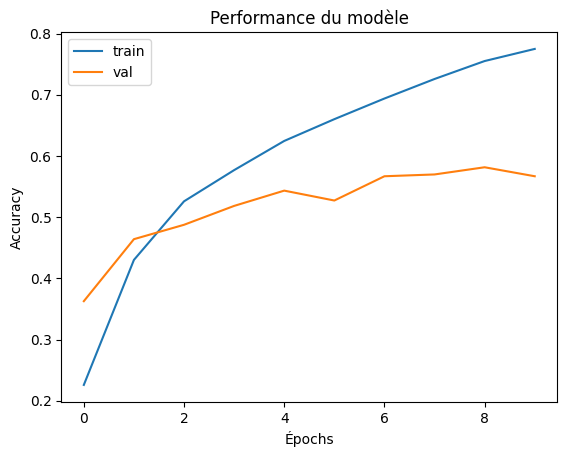

In [11]:

# 7. Afficher l’évolution de l’apprentissage
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Performance du modèle")
plt.show()